# Compare Johns Hopkins and RKI data for Germany

In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
# or try ""%matplotlib notebook" for more interactive exploration

import datetime
import matplotlib.pyplot as plt
import pandas as pd
import oscovida as ov

In [2]:
ov.display_binder_link("compare-rki-and-johns-hopkins-data.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/compare-rki-and-johns-hopkins-data.ipynb)

In [3]:
print(f"Notebook created:  01 November 2020.")
print(f"Notebook executed: {datetime.datetime.now().strftime('%d %B %Y')}.")

Notebook created:  01 November 2020.
Notebook executed: 24 March 2021.


## Load data from Johns Hopkins university:

In [4]:
cases_jh, deaths_jh = ov.get_country_data("Germany")

## Load data from RKI

In [5]:
germany = ov.fetch_data_germany()
germany.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
date,,,,,,,,,,,,,,,,,,
2020-09-30,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/09/30 00:00:00,1001,"24.03.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00,0,1,0,Nicht übermittelt
2020-10-29,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/10/29 00:00:00,1001,"24.03.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00,0,1,0,Nicht übermittelt
2020-11-03,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/03 00:00:00,1001,"24.03.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00,0,1,0,Nicht übermittelt
2020-11-20,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/20 00:00:00,1001,"24.03.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00,0,1,1,Nicht übermittelt
2020-11-23,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/23 00:00:00,1001,"24.03.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00,0,1,1,Nicht übermittelt


The meaning of the entries in the RKI data are explained at
https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74

Here, we look at one particular item that is the date attached to each row reported in the  file. There is:
- `Meldedatum`: data at which the health authoraties became aware of the case
- `Refdatum`: reference date, which is "Erkrankungsdatum" (date of getting sick), or - if not know - the `Meldedatum`.

From the Johns Hopkins University there is only one data available for the numbers of cases and deaths for the whole of Germany.

In [6]:
g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
g2.index.name = 'date'
g3 = g2.groupby('date').agg('sum')
cases_rki_mel = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths_rki_mel = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()

In [7]:
g4 = germany.set_index(pd.to_datetime(germany['Refdatum']))
g4.index.name = 'date'
g5 = g4.groupby('date').agg('sum')
cases_rki_ref = g5["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths_rki_ref = g5["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()

## Comparative plots

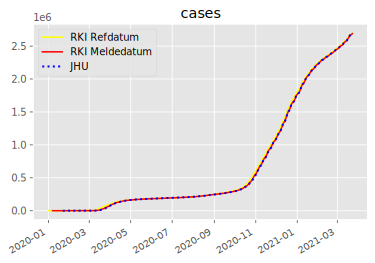

In [8]:
fig, ax = plt.subplots()
ax.plot(cases_rki_ref.index, cases_rki_ref.values, "-", 
        label="RKI Refdatum", color="yellow")
ax.plot(cases_rki_mel.index, cases_rki_mel.values, "-", 
        label="RKI Meldedatum", color="red")
ax.plot(cases_jh.index, cases_jh.values, ":", 
        label="JHU", linewidth=2,  color="blue")
ax.legend()
ax.set_title("cases")

fig.autofmt_xdate()

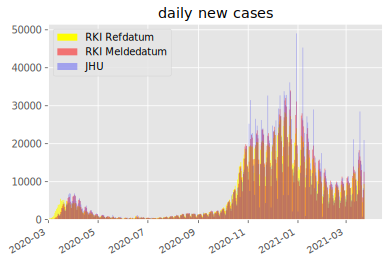

In [9]:
fig, ax = plt.subplots()
ax.bar(cases_rki_ref.index, cases_rki_ref.diff().values, alpha=1.0, 
       label="RKI Refdatum", color="yellow")
ax.bar(cases_rki_mel.index, cases_rki_mel.diff().values, alpha=0.5, 
       label="RKI Meldedatum", color="red")
ax.bar(cases_jh.index, cases_jh.diff().values, alpha=0.3, 
       label="JHU", color="blue")
ax.legend()
ax.set_title("daily new cases")
ax.set_xlim(left = pd.to_datetime("2020-03-01"))

fig.autofmt_xdate()

### Observations cases

- The total number of cases for JHU and RKI data is similar
- The JHU data is more similar to the `Meldedatum` than the `Refdatum` in the RKI data

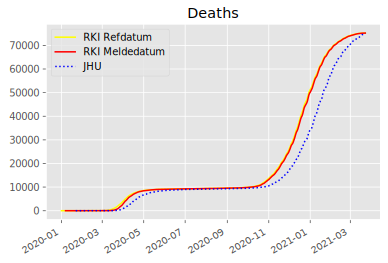

In [10]:
fig, ax = plt.subplots()
ax.plot(deaths_rki_ref.index, deaths_rki_ref.values, "-", 
        label="RKI Refdatum", color="yellow")
ax.plot(deaths_rki_mel.index, deaths_rki_mel.values, "-", 
        label="RKI Meldedatum", color="red")
ax.plot(deaths_jh.index, deaths_jh.values, ":", 
        label="JHU", color="blue")
ax.legend()
ax.set_title("Deaths")

fig.autofmt_xdate()

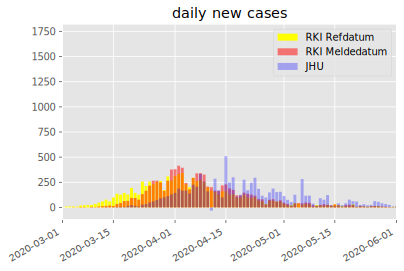

In [11]:
fig, ax = plt.subplots()
ax.bar(deaths_rki_ref.index, deaths_rki_ref.diff().values, alpha=1.0, 
       label="RKI Refdatum", color="yellow")
ax.bar(deaths_rki_mel.index, deaths_rki_mel.diff().values, alpha=0.5, 
       label="RKI Meldedatum", color="red")
ax.bar(deaths_jh.index, deaths_jh.diff().values, alpha=0.3, 
       label="JHU", color="blue")
ax.legend()
ax.set_title("daily new cases")
ax.set_xlim(left = pd.to_datetime("2020-03-01"), 
            right=pd.to_datetime("2020-06-01"))

fig.autofmt_xdate()

### Observations deaths
   
The total number of deaths reported show differences in the associated dates: 
- RKI reference data has the dates furthest in the past
- RKI Meldedatum follows this (with several days delay - see plot above)
- The JHU data has even more recent dates attached

The difference between cases numbers reported from JHU and RKI is smaller than the differences regarding the deaths.